# Assignment 2: Spam Classification with SVM

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

![Spam email](https://www.saleshandy.com/blog/wp-content/uploads/2017/01/wsi-imageoptim-11-Reasons-Why-Your-Email-Ends-Up-In-Spam.png)

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (20 pts)

**Data Acquiring:** Download the spam dataset from UC Irvine. You can find the dataset attached with the assignment in Collab. Note that the data is in raw file, so you have to convert them into a readable format (ie. CSV). Please be sure to read its documentation to learn more about the dataset. 

**Data Splitting:** Put data into the format needed for classification task, then split it into 80% training, 20% testing (each should have approximately the same proportion between positive and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your SVM model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard library StandardScaler to normalize the value of each features.

In [1]:
# You might want to use the following packages
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


COL_NAMES = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'spam'
]
data = pd.read_csv("spambase.data",names = COL_NAMES)
data.describe()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/tools/datetimes.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [2]:
print(data.corr())

                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000          -0.016759       0.065627   
word_freq_address                -0.016759           1.000000      -0.033526   
word_freq_all                     0.065627          -0.033526       1.000000   
word_freq_3d                      0.013273          -0.006923      -0.020246   
word_freq_our                     0.023119          -0.023760       0.077734   
word_freq_over                    0.059674          -0.024840       0.087564   
word_freq_remove                  0.007669           0.003918       0.036677   
word_freq_internet               -0.003950          -0.016280       0.012003   
word_freq_order                   0.106263          -0.003826       0.093786   
word_freq_mail                    0.041198           0.032962       0.032075   
word_freq_receive                 0.188459          -0.006864       0.048254   
word_freq_will                    0.1058

In [3]:
attributes = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'spam']
#scatter_matrix(data[attributes], figsize=(360, 240))
#plt.savefig("scatter_matrix_plot")

Since this file is so large it is attached as a png in the same folder as the project and will not compile each time.

In [4]:

X_train,X_test = train_test_split(data, test_size=0.2, random_state=42) #split data based on random value
y_train = X_train.pop("spam")
y_test = X_test.pop("spam")
scaler = StandardScaler();
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


- - -
## 2. TRAINING LINEAR SVM FOR SPAM CLASSIFICATION (15 pts)

Train your linear SVM classifier on the training data, and then test the classifier on the test data. You may use the default **loss function** (="hinge") and **default** value of the C hyperparameter (=1.0):

* Report (1) accuracy, (2) precision, (3) recall, and (4) F-score on the test data
* Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. You may use library function calls to create the ROC curve.

**Implementation Notes:** For SVM, you do NOT need to add a column of 1's to the $\mathbf{x}$ matrix to have an intercept term



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:     0.9250814332247557
Precision:    0.9349593495934959
Recall:       0.8846153846153846
F-score:      0.909090909090909


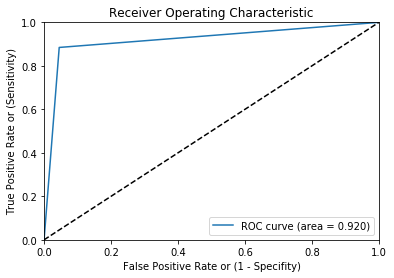

In [5]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train,y_train)

output = svm_clf.predict(X_test)
# Testing your svm here

recall = recall_score(y_test,output)
precision = precision_score(y_test,output)
print("Accuracy:    ", accuracy_score(y_test,output))
print("Precision:   " ,precision)
print("Recall:      ", recall)
print("F-score:     ", 2*(precision*recall)/(precision+recall))

fpr, tpr, thresholds = roc_curve(y_test, output,pos_label=1)
roc_auc = roc_auc_score(y_test,output)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


- - -
## 3. TUNING REGULARIZATION HYPER-PARAMETER C (15 pts)
Next, you will study the SVM tradeoff between margin and data violation by using different values of the C hyper-parameter. Your task is to run an experiment with different values of C on the spam dataset and report the performance measures similar to section 2. After running the experiment, you must provide some justifications on the reason you select a certain value of C. 

Hint: you can use cross validation for each value of C and then pick the value which yields the best performance.

In [6]:
C_vals = [.5,.8,1.5,2,2.5,3,6,10,20,40,80,100,150,250,500,1000]
import warnings; warnings.simplefilter('ignore')
bestF1=0
bestC=0
for value in C_vals:
    print('C Value:  ', value)
    svm_clf = LinearSVC(C=value, loss="hinge", random_state=42,max_iter=10000)
    svm_clf.fit(X_train,y_train)
    
    output = svm_clf.predict(X_test)
    # Testing your svm here

    recall = recall_score(y_test,output)
    precision = precision_score(y_test,output)
    f1 = 2*(precision*recall)/(precision+recall)
    print("Accuracy:    ", accuracy_score(y_test,output))
    print("Precision:   " ,precision)
    print("Recall:      ", recall)
    print("F-score:     ", f1)
    if(f1>bestF1):
        bestF1= f1
        bestC = value
print("Best C value is ",bestC," with a f1 score of ", bestF1)

    

C Value:   0.5
Accuracy:     0.9229098805646037
Precision:    0.9346049046321526
Recall:       0.8794871794871795
F-score:      0.9062087186261559
C Value:   0.8
Accuracy:     0.9229098805646037
Precision:    0.9346049046321526
Recall:       0.8794871794871795
F-score:      0.9062087186261559
C Value:   1.5
Accuracy:     0.9229098805646037
Precision:    0.9322493224932249
Recall:       0.882051282051282
F-score:      0.9064558629776021
C Value:   2
Accuracy:     0.9250814332247557
Precision:    0.9326145552560647
Recall:       0.8871794871794871
F-score:      0.9093298291721419
C Value:   2.5
Accuracy:     0.9261672095548317
Precision:    0.9327956989247311
Recall:       0.8897435897435897
F-score:      0.9107611548556431
C Value:   3
Accuracy:     0.9239956568946797
Precision:    0.9324324324324325
Recall:       0.8846153846153846
F-score:      0.9078947368421053
C Value:   6
Accuracy:     0.9239956568946797
Precision:    0.9324324324324325
Recall:       0.8846153846153846
F-score:   

I chose the value of C of 2.5 becuase in the section above I tested a large range of C values on the dataset by training a model with that C and testing the accuracy on the test set. For the value of C of 2.5 the accuracy and F1 score was the highest so I will use that value in the future for linear SVM.

- - -
## 4. SELECTING THE FEATURES WITH LINEAR SVM (20 pts)

Once your learned a best linear SVM in previous sections, your next task is to find which are best features to classify spam. First, you must obtain the weight vector $\mathbf{w}$ using the attribute $coef_$ of your SVM classifier. Then, for the number of features $n = 2$ to $57$, you will run the following in a loop:

* Select a set of top $n$ features that have the highest weights
* Train a classifier $\text{SVM}_n$ on all training data, only using these $n$ features with the same hyperparameter C learn from section 3.
* Test $\text{SVM}_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

Identify the top 5 features. Using the plot, discuss the effects of feature selection on the performance in a short paragraph (ie. How much better the performance becomes everytime one of top 5 features is added? Were the top spam features surprising to you?)  



In [7]:
# Your feature selection code goes here
svm_clf = LinearSVC(C=2.5, loss="hinge", random_state=42,max_iter=10000)
svm_clf.fit(X_train,y_train)
coef = svm_clf.coef_
coefNew =[]
coef1 =[]
for i in range(0,55):
    coef1.append(abs(coef[0][i]))
coef = sorted(range(len(coef1)),key=coef1.__getitem__)
coefNew =[]
for i in range(0,55):
    coefNew.append(coef[54-i])
    #coefNew.append(coef[i])
accuracyOverN = []
# print(coef1)
# print(coefNew)
x_values = []
x_values.append(coefNew[0])
X_train_new = X_train[:,x_values]
X_test_new = X_test[:,x_values]
nVals=[]
svm_clf = LinearSVC(C=2.5, loss="hinge", random_state=42,max_iter=10000)
top5Features=[]
for n in range(2,56):
    x_values.append(coefNew[n-1])
    X_train_new = X_train[:,x_values]
    X_test_new = X_test[:,x_values]
    print("N =",n)
    svm_clf.fit(X_train_new,y_train)
    output = svm_clf.predict(X_test_new)
    # Testing your svm here
    nVals.append(n)
    recall = recall_score(y_test,output)
    precision = precision_score(y_test,output)
    accuracy = accuracy_score(y_test,output)
    accuracyOverN.append(accuracy)
    print("Accuracy:    ", accuracy)
    print("Precision:   " ,precision)
    print("Recall:      ", recall)
    print("F-score:     ", 2*(precision*recall)/(precision+recall))


N = 2
Accuracy:     0.6959826275787188
Precision:    0.5843558282208589
Recall:       0.9769230769230769
F-score:      0.7312859884836852
N = 3
Accuracy:     0.7144408251900108
Precision:    0.6
Recall:       0.9769230769230769
F-score:      0.7434146341463415
N = 4
Accuracy:     0.7654723127035831
Precision:    0.65
Recall:       0.9666666666666667
F-score:      0.7773195876288661
N = 5
Accuracy:     0.7774158523344191
Precision:    0.6642984014209592
Recall:       0.958974358974359
F-score:      0.7848898216159497
N = 6
Accuracy:     0.7861020629750272
Precision:    0.9488372093023256
Recall:       0.5230769230769231
F-score:      0.6743801652892563
N = 7
Accuracy:     0.7915309446254072
Precision:    0.95
Recall:       0.5358974358974359
F-score:      0.6852459016393442
N = 8
Accuracy:     0.8067318132464713
Precision:    0.9491525423728814
Recall:       0.5743589743589743
F-score:      0.7156549520766773
N = 9
Accuracy:     0.8349619978284474
Precision:    0.9375
Recall:       0.65

In [8]:
topFive =x_values[0:5]
print("Top 5 features",topFive)
for i in range(0,5):
    print("Feature:", data.columns[x_values[i]])

Top 5 features [26, 24, 40, 45, 43]
Feature: word_freq_george
Feature: word_freq_hp
Feature: word_freq_cs
Feature: word_freq_edu
Feature: word_freq_project


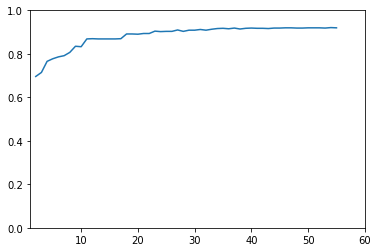

In [9]:
axes = plt.gca()
axes.set_ylim([0,1])
axes.set_xlim([1,60])
plt.plot(nVals,accuracyOverN)

The top 5 features were word_freq_george, word_freq_hp ,word_freq_cs, word_freq_edu, word_freq_project.  These were suprising as they don't stand out as features that would predict spam that well. However, the values of these features in the coef matrix were the highest out of all the features.  The graph above shows that as each of these 5 features were added the accuracy increased significantly. These features produced the biggest jump in accuracy which makes sense as they are the best predictors.

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on this dataset which is not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

First, your task is to determine the best regularization $C$ and the spread of the Gaussian kernel $\gamma$ hyperparameters to use. You can train the SVM on the training set and report the performance in metrics from section 2. By using different values of $C$ and $\gamma$, you will be able to learn a good non-linear decision boundary that can perform reasonably well for this dataset. 

Next, you will compare the performance of this kernelized version of SVM and the of linear SVM in Section 3. You will need to plot out the performance in terms of accuracy, precision, and recall, and the ROC curve) for both. How much better does your non-linear SVM classifier perform comparing to a linear SVM? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error using cross validation.

Finally, write a paragraph reporting on the final performance of your RBF kerneled SVM. Do you think the performance is adequate to be deployed in practice? Justify your reasons.




In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

gammas = [0.00010,0.0005,0.00075,0.001,0.005,.01,.15,.2,.3,.5,1,2,4]
Cvals =[.5,1,2,2.5,3,4,5,10,25,50]

bestAccuracy=0
bestC=0
bestGamma=0
for gval in gammas:
    for Cval in Cvals:
        print("Gamma:",gval,"C value:",Cval)
        rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gval, C=Cval)
        rbf_kernel_svm_clf.fit(X_train, y_train)
        output = rbf_kernel_svm_clf.predict(X_test)
        scores = cross_val_score(rbf_kernel_svm_clf, X_train, y_train, cv=5)
        print(scores)
        crossValAccuracy = sum(scores)/len(scores)
        # Testing your svm here
        #nVals.append(n)
        recall = recall_score(y_test,output)
        precision = precision_score(y_test,output)
        accuracy = crossValAccuracy
        #accuracyOverN.append(accuracy)
        print("Accuracy:    ", accuracy)
        print("Precision:   " ,precision)
        print("Recall:      ", recall)
        print("F-score:     ", 2*(precision*recall)/(precision+recall))
        if(accuracy>bestAccuracy):
            bestC = Cval;
            bestGamma = gval;
            bestAccuracy = accuracy
print("Best C val is",bestC,"best gamma is ", bestGamma,"with an accuracy of", bestAccuracy)



Gamma: 0.0001 C value: 0.5
[0.69742198 0.70420624 0.69972826 0.69387755 0.69795918]
Accuracy:     0.6986386436174375
Precision:    0.9793103448275862
Recall:       0.3641025641025641
F-score:      0.530841121495327
Gamma: 0.0001 C value: 1
[0.79240163 0.78968792 0.79891304 0.80544218 0.8       ]
Accuracy:     0.797288954517563
Precision:    0.9576271186440678
Recall:       0.5794871794871795
F-score:      0.7220447284345048
Gamma: 0.0001 C value: 2
[0.85345997 0.83989145 0.8451087  0.85442177 0.84353741]
Accuracy:     0.8472838608040704
Precision:    0.9568345323741008
Recall:       0.6820512820512821
F-score:      0.7964071856287426
Gamma: 0.0001 C value: 2.5
[0.86160109 0.84667571 0.85326087 0.85714286 0.86122449]
Accuracy:     0.8559810028666058
Precision:    0.9618055555555556
Recall:       0.7102564102564103
F-score:      0.8171091445427728
Gamma: 0.0001 C value: 3
[0.86567164 0.85210312 0.86141304 0.86530612 0.86666667]
Accuracy:     0.8622321190289579
Precision:    0.95049504950

[0.93894166 0.90909091 0.94157609 0.94013605 0.93197279]
Accuracy:     0.9323434989888822
Precision:    0.9594594594594594
Recall:       0.9102564102564102
F-score:      0.9342105263157894
Gamma: 0.005 C value: 0.5
[0.91858887 0.9009498  0.92255435 0.93741497 0.91156463]
Accuracy:     0.9182145219895521
Precision:    0.9464788732394366
Recall:       0.8615384615384616
F-score:      0.9020134228187919
Gamma: 0.005 C value: 1
[0.92265943 0.9036635  0.92934783 0.94285714 0.92108844]
Accuracy:     0.9239232670237583
Precision:    0.9444444444444444
Recall:       0.8717948717948718
F-score:      0.9066666666666667
Gamma: 0.005 C value: 2
[0.93351425 0.90502035 0.94021739 0.94421769 0.9292517 ]
Accuracy:     0.9304442757576158
Precision:    0.9506849315068493
Recall:       0.8897435897435897
F-score:      0.919205298013245
Gamma: 0.005 C value: 2.5
[0.93351425 0.9063772  0.94157609 0.94421769 0.93197279]
Accuracy:     0.9315316029957497
Precision:    0.948509485094851
Recall:       0.8974358

[0.86160109 0.85481682 0.87092391 0.86530612 0.86802721]
Accuracy:     0.8641350313649145
Precision:    0.9533333333333334
Recall:       0.7333333333333333
F-score:      0.8289855072463769
Gamma: 0.2 C value: 50
[0.86160109 0.85617368 0.8763587  0.86394558 0.86802721]
Accuracy:     0.8652212494637403
Precision:    0.9438943894389439
Recall:       0.7333333333333333
F-score:      0.8253968253968254
Gamma: 0.3 C value: 0.5
[0.79375848 0.80054274 0.80842391 0.80680272 0.79863946]
Accuracy:     0.8016334622162239
Precision:    0.9895833333333334
Recall:       0.48717948717948717
F-score:      0.6529209621993127
Gamma: 0.3 C value: 1
[0.84260516 0.84667571 0.84103261 0.85034014 0.84217687]
Accuracy:     0.8445660967767438
Precision:    0.9721115537848606
Recall:       0.6256410256410256
F-score:      0.7613104524180967
Gamma: 0.3 C value: 2
[0.84396201 0.84667571 0.84646739 0.85170068 0.84489796]
Accuracy:     0.8467407502497194
Precision:    0.9695817490494296
Recall:       0.6538461538461

[0.77069199 0.77204885 0.78125    0.78231293 0.75782313]
Accuracy:     0.7728253791340145
Precision:    0.9722222222222222
Recall:       0.44871794871794873
F-score:      0.6140350877192982
Gamma: 2 C value: 50
[0.77069199 0.77069199 0.78125    0.78231293 0.75782313]
Accuracy:     0.7725540087133903
Precision:    0.9725274725274725
Recall:       0.45384615384615384
F-score:      0.6188811188811189
Gamma: 4 C value: 0.5
[0.68113976 0.67842605 0.69836957 0.69115646 0.67346939]
Accuracy:     0.6845122445769058
Precision:    1.0
Recall:       0.24102564102564103
F-score:      0.3884297520661157
Gamma: 4 C value: 1
[0.74762551 0.75576662 0.75407609 0.76054422 0.74285714]
Accuracy:     0.7521739155517083
Precision:    0.9875776397515528
Recall:       0.4076923076923077
F-score:      0.5771324863883847
Gamma: 4 C value: 2
[0.75440977 0.76390773 0.77173913 0.77278912 0.74965986]
Accuracy:     0.76250112268375
Precision:    0.9880239520958084
Recall:       0.4230769230769231
F-score:      0.592

In [11]:
bestC = 4
bestGamma = .005
coef = svm_clf.coef_
coef = np.argsort(coef)
dfnew = X_train[[26,40,33]]
nVals =[]
x_values = [coef[0][0]]
X_train_new = X_train[:,x_values]
X_test_new = X_test[:,x_values]
linearAccuracy =[]
kernelAccuracy =[]
linearPrecision =[]
kernelPrecision =[]
linearRecall = []
kernelRecall = []
svm_clf = LinearSVC(C=2.5, loss="hinge", random_state=42,max_iter=10000)
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=bestGamma, C=bestC)
for n in range(2,56):
    x_values.append(coef[0][n-1])
    X_train_new = X_train[:,x_values]
    X_test_new = X_test[:,x_values]
    #print("N =",n)
    nVals.append(n)
    svm_clf.fit(X_train_new,y_train)
    rbf_kernel_svm_clf.fit(X_train_new,y_train)
    output = svm_clf.predict(X_test_new)
    outputKernel = rbf_kernel_svm_clf.predict(X_test_new)
    # Testing your svm here
    recall = recall_score(y_test,output)
    precision = precision_score(y_test,output)
    accuracy = accuracy_score(y_test,output)
    recallKernel = recall_score(y_test,outputKernel)
    precisionKernel = precision_score(y_test,outputKernel)
    accuracyKernel = accuracy_score(y_test,outputKernel)
    linearAccuracy.append(accuracy)
    kernelAccuracy.append(accuracyKernel)
    linearPrecision.append(precision)
    kernelPrecision.append(precisionKernel)
    linearRecall.append(recall)
    kernelRecall.append(recallKernel)

print("Final Linear Accuracy:",accuracy)
print("Final Kernel Accuracy:",accuracyKernel)
    


Final Linear Accuracy: 0.9196525515743756
Final Kernel Accuracy: 0.9381107491856677


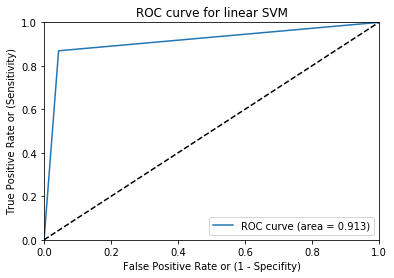

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, output,pos_label=1)
roc_auc = roc_auc_score(y_test,output)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve for linear SVM')
plt.legend(loc="lower right")
plt.show()

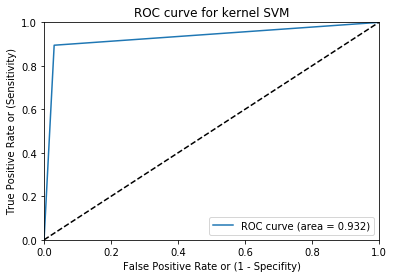

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, outputKernel,pos_label=1)
roc_auc = roc_auc_score(y_test,outputKernel)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC curve for kernel SVM')
plt.legend(loc="lower right")
plt.show()


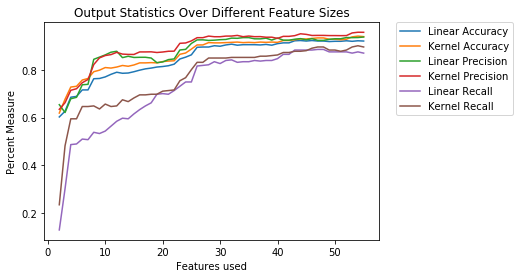

In [14]:
plt.plot(nVals,linearAccuracy,label ="Linear Accuracy")
plt.plot(nVals,kernelAccuracy,label ="Kernel Accuracy")
plt.plot(nVals,linearPrecision,label ="Linear Precision")
plt.plot(nVals,kernelPrecision,label ="Kernel Precision")
plt.plot(nVals,linearRecall,label ="Linear Recall")
plt.plot(nVals,kernelRecall,label ="Kernel Recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Features used')  
plt.ylabel('Percent Measure')  
plt.title('Output Statistics Over Different Feature Sizes')
plt.show()

The kernelized version of the SVM is better in all 3 measures: accuracy, recall, and precision. Therefore, I would reccomend that the kernelized version be used in practice with the hyperparameters found above.  The accuracy for the kernel version of the SVM was 93% with the choosen hyperparameters so I would say that this is good enough to use in the real world. The only change I would reccomend is that one could make a model that favors precision over recall because it would be better to let some spam through rather than classify non-spam as spam. This would allow the user to see all their normal messages and a reduced number of spam messages.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 2:...".

Best of luck and have fun!